In [1]:
import sys
sys.path.append('./code/')
from process_loops import *
from make_droso_figures import *

def make_anc_int(anc):
    return anc[0], int(anc[1]), int(anc[2])



In [4]:
import cooler
cool_merged_800 = cooler.Cooler('./cools/DOWNSAMPLED_merged_all_800.cool')

Import  expected table

In [11]:
import pandas as pd
merged_expected = pd.read_csv(f'./obs_exp/expected/expected_DOWNSAMPLED_merged_all_800.cool.tsv', sep='\t')
merged_expected['region'] = merged_expected['region'].apply(lambda x: str(x))

expected_dict = {
    'merged' : merged_expected,
}

Load mustache loops

In [13]:
loop_directory = './loop_calling/mustache_output/'
loop_filename = 'out_merged_DOWNSAMPLE.tsv'

loose_anchors, loose_loops1 = process_loops(loop_directory, loop_filename, cool_merged_800, 
                                            expected_dict['merged'], 800, merge_wsz=4, center_wsz=6)


/Genomics/pritykinlab/gabe/nc14/jupys/FINAL_CODE/./code/process_loops.py:375: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  expected[diags==val] = float(row['balanced.avg'])


Load expected tables for each condition

In [18]:
res=800
cool_nc18 = cooler.Cooler(f'./cools/nc1-8_1_1+1_2+2_1+2_2.base_resolution=100.mcool::/resolutions/{res}')
cool_nc14 = cooler.Cooler(f'./cools/nc14_1_1+1_2+2_1+2_2.base_resolution=100.mcool::/resolutions/{res}')
cool_s10 = cooler.Cooler(f'./cools/s10-12_1_1+1_2+2_1+2_2.base_resolution=100.mcool::/resolutions/{res}')

cool_dict = {
    'nc18' : cool_nc18,
    'nc14' : cool_nc14,
    's10' : cool_s10,
}

nc14_expected = pd.read_csv(f'obs_exp/expected/expected_nc14_1_1+1_2+2_1+2_2.base_resolution=100.mcool_800.tsv', sep='\t')
nc14_expected['region'] = nc14_expected['region'].apply(lambda x: str(x))

nc18_expected = pd.read_csv(f'obs_exp/expected/expected_nc1-8_1_1+1_2+2_1+2_2.base_resolution=100.mcool_800.tsv', sep='\t')
nc18_expected['region'] = nc18_expected['region'].apply(lambda x: str(x))

s10_expected = pd.read_csv(f'obs_exp/expected/expected_s10-12_1_1+1_2+2_1+2_2.base_resolution=100.mcool_800.tsv', sep='\t')
s10_expected['region'] = nc18_expected['region'].apply(lambda x: str(x))

expected_dict = {
    'nc18' : nc18_expected,
    'nc14' : nc14_expected,
    's10' : s10_expected,    
}

Confirm presence of mustache loops

3


/Genomics/pritykinlab/gabe/nc14/jupys/FINAL_CODE/./code/make_droso_figures.py:463: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  expected[diags==val] = float(row['balanced.avg'])


dict_keys(['nc18', 'nc14', 's10']) 3


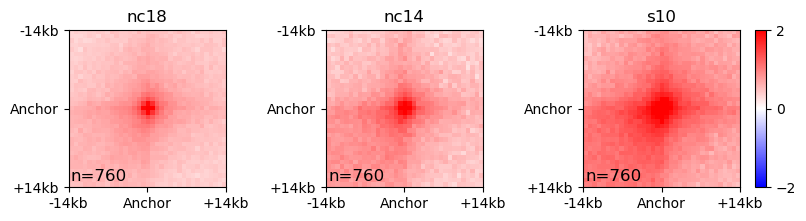

In [21]:
from make_droso_figures import *

def make_anc_int(anc):
    return anc[0], int(anc[1]), int(anc[2])

loopset = set()
for i in loose_loops1:
    l1, l2 = make_anc_int(i[:3]), make_anc_int(i[3:6])
    l1, l2 = map(tuple, [l1, l2])
    loopset.add(tuple(i[:6]))

test_apa = apa_noroll(loopset, cool_dict, expected_dict, wsz=20)
f, bad = plot_apa(test_apa, badfunc=None)

Any loops with an obs/exp of greater than 50 at multiple sites is filtered (it is likely artifactual)

In [23]:
badset = {tuple(x[0]) for c, x in enumerate(test_apa[-1]) if bad[c]==True}
filt_loopset = set()
for loop in loopset:
    if loop in badset:
        pass
    else:
        filt_loopset.add(loop)

Final loopset is saved

In [25]:
vals = []
for x in filt_loopset:
    l1, l2 = x[:3], x[3:6]
    vals.append(list(l1) + list(l2))
df = pd.DataFrame(vals)
df.columns = ['BIN1_CHR', 'BIN1_START', 'BIN1_END','BIN2_CHROMOSOME', 'BIN2_START', 'BIN2_END']
df.to_csv('./loop_calling/final_loops/out.tsv', sep='\t', header=True, index=None)

loose_anchors, loose_loops = process_loops_without_moving('./loop_calling/final_loops/', extend_bins=1, res=800)